In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv("/content/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

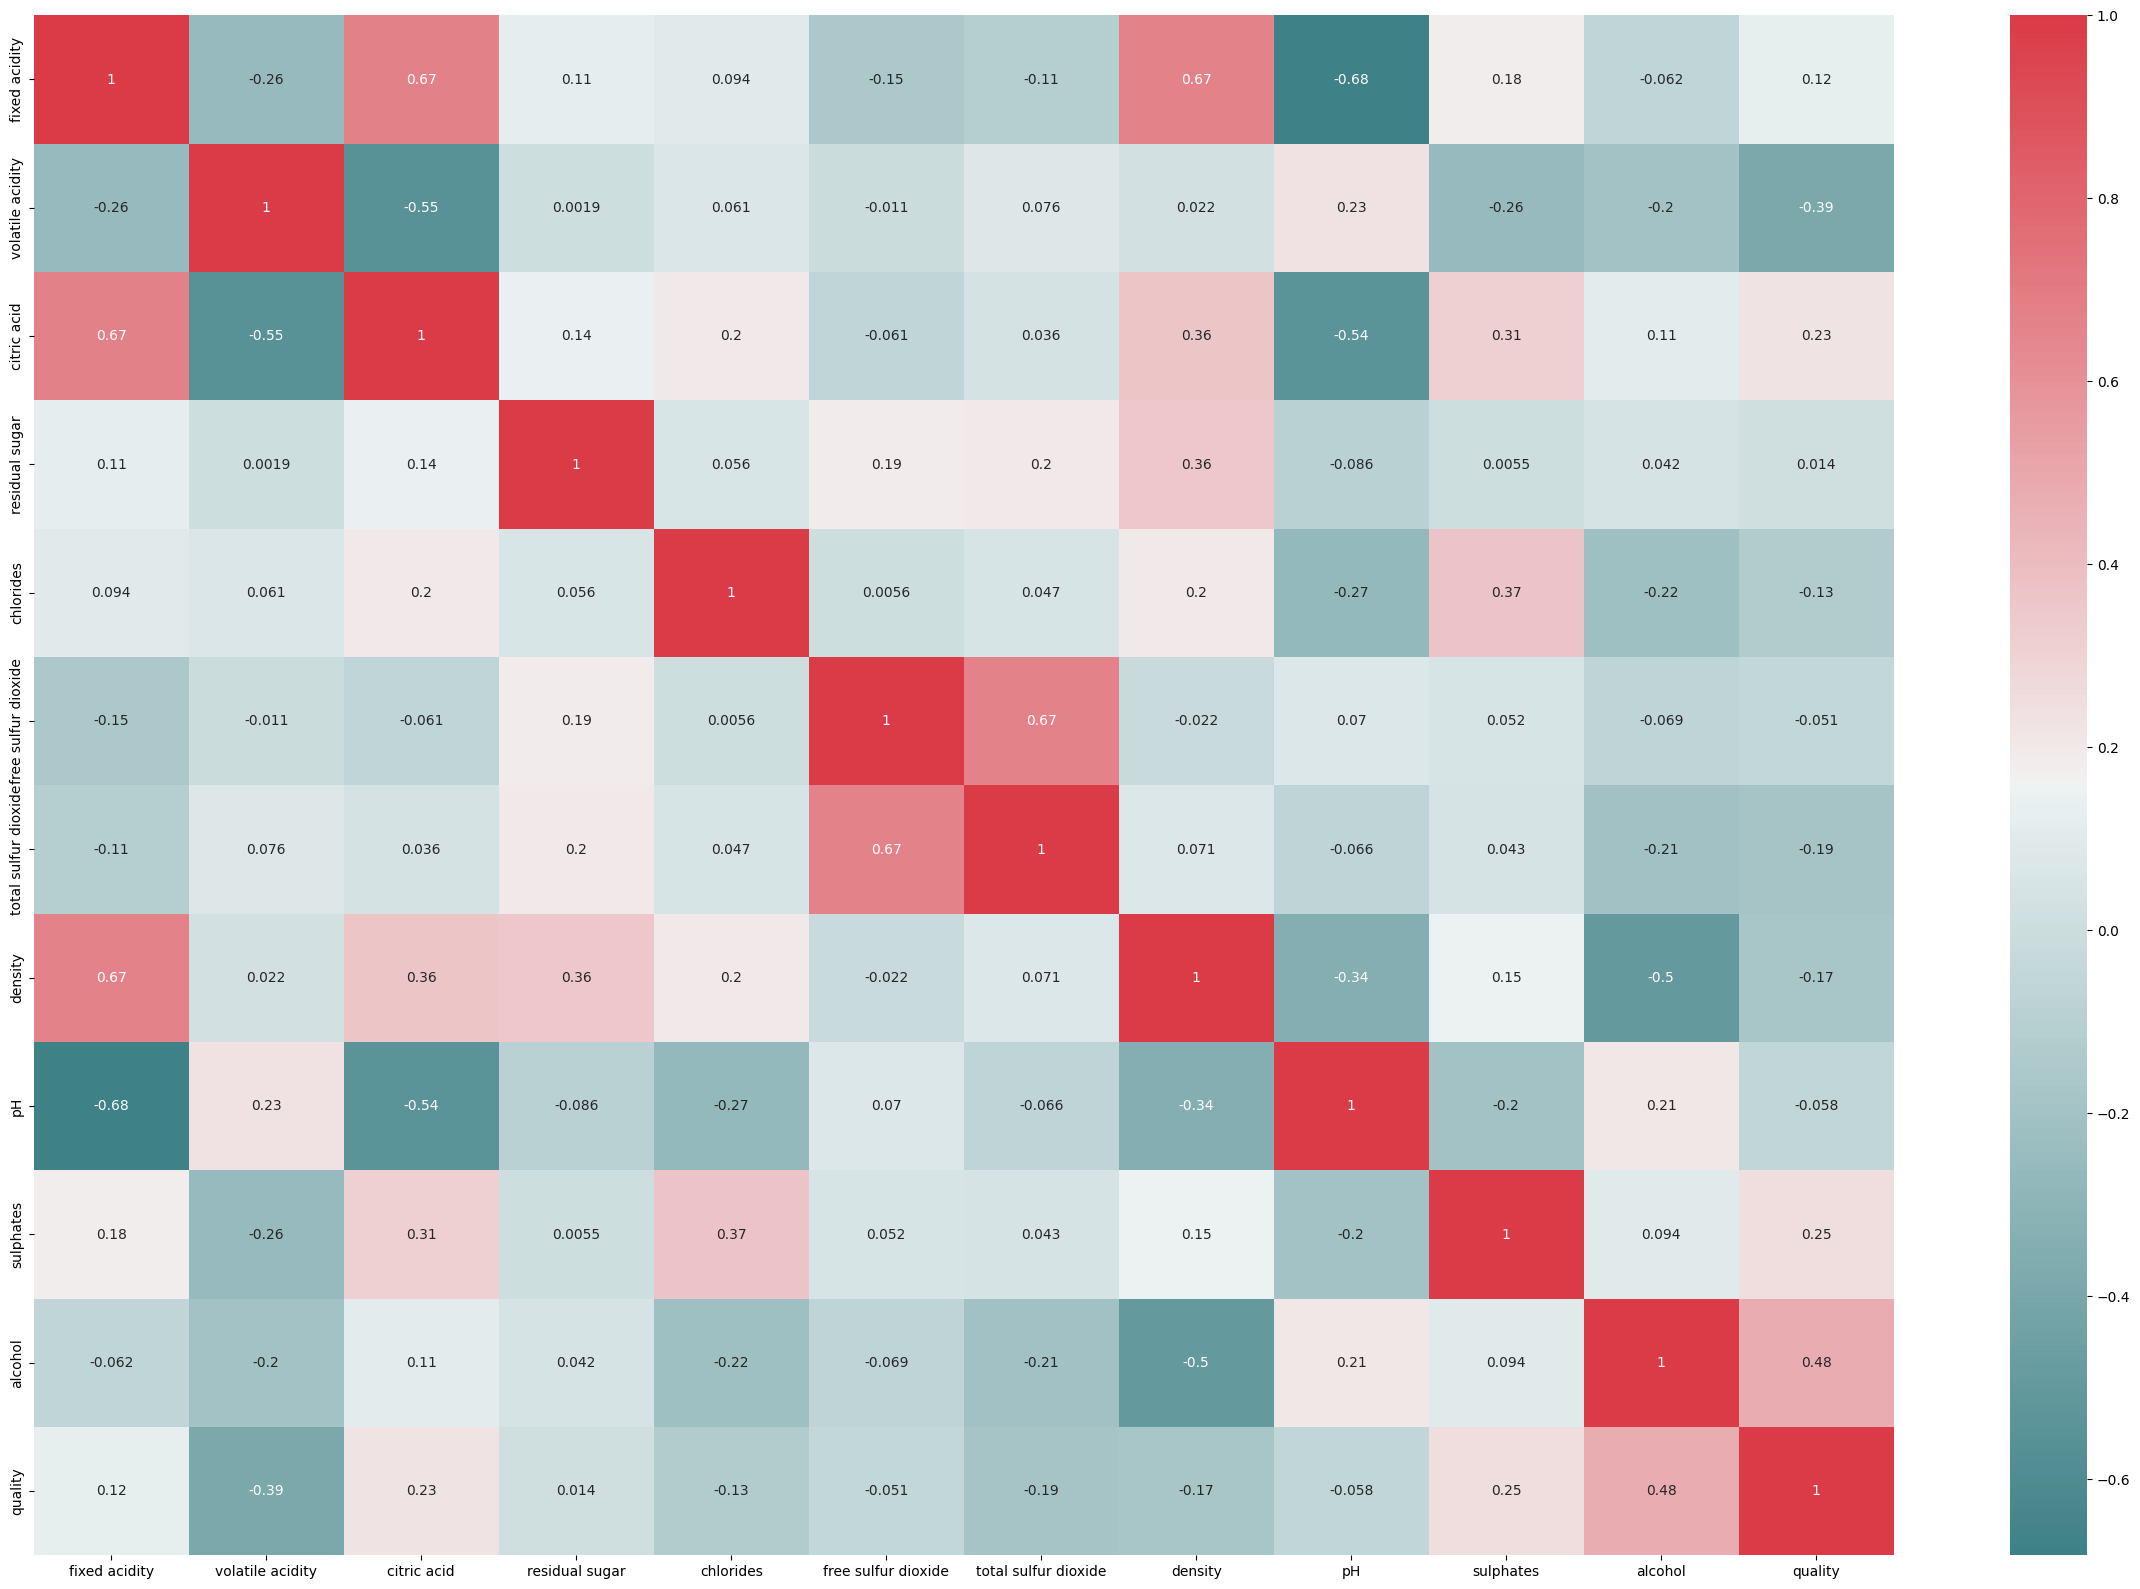

In [6]:
#Data Exploration
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,20))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

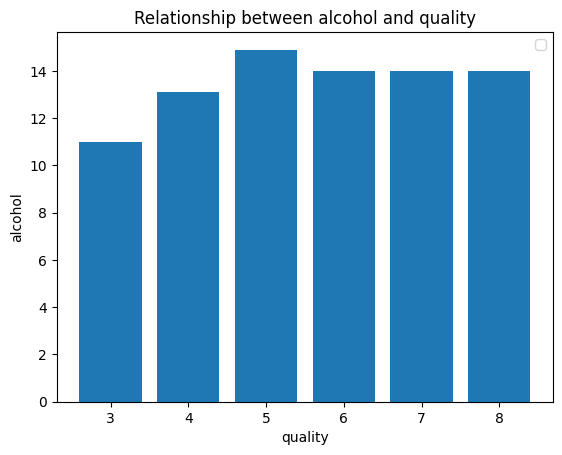

In [7]:
plt.bar(df['quality'], df['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = scaler.fit_transform(df)
normal_df = pd.DataFrame(normal_df, columns = df.columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

In [9]:
df["good wine"] = ["yes" if i >= 7 else "no" for i in df['quality']]

In [10]:
X = normal_df.drop(["quality"], axis = 1)
y = df["good wine"]

In [11]:
y.value_counts()

no     1382
yes     217
Name: good wine, dtype: int64

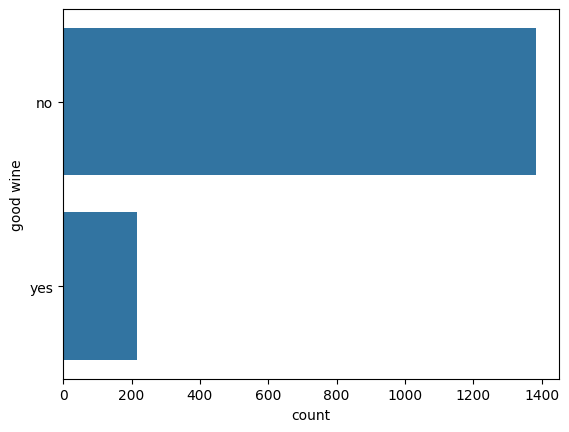

In [12]:
sns.countplot(y)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
#Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Predict labels on the test set
y_pred = dt.predict(X_test)

In [42]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


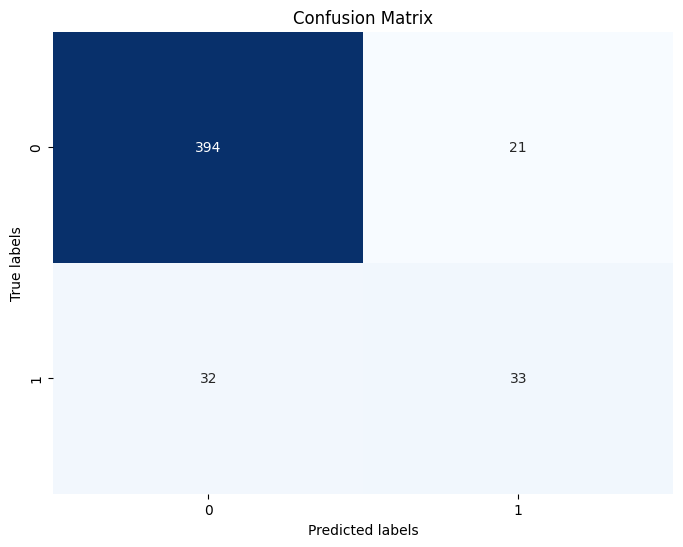

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


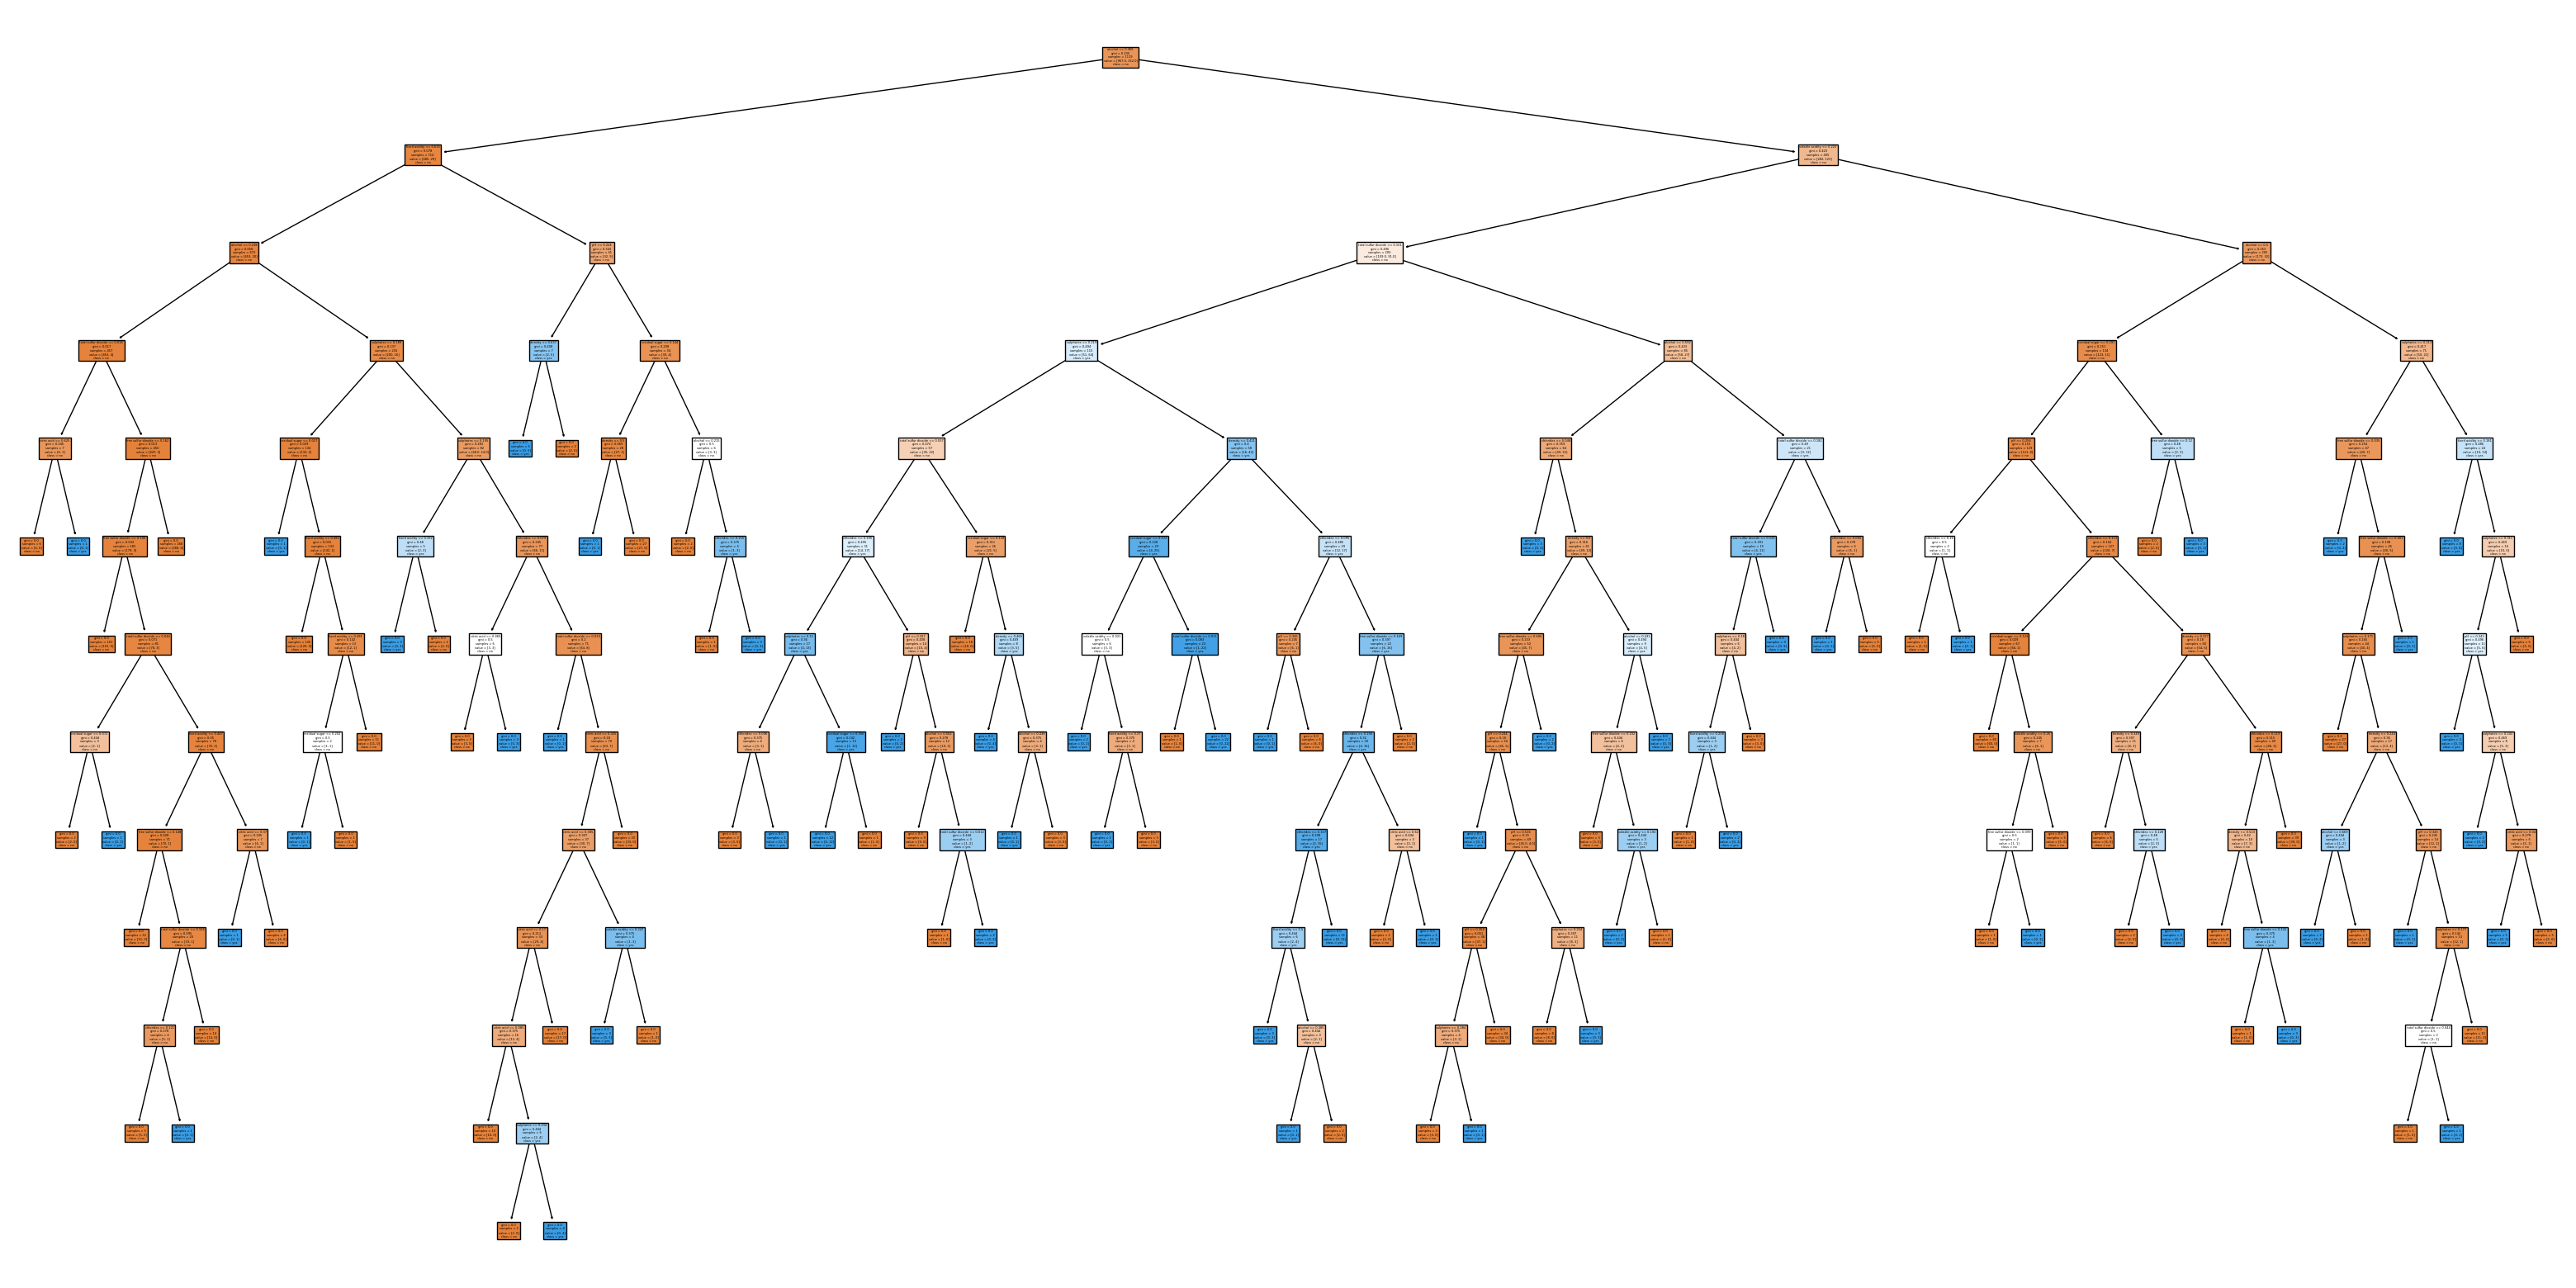

In [18]:
from sklearn import tree
plt.figure(figsize=(40,20))
fn = X.columns
cn = y.unique()
tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.7954878526645768


In [23]:
from sklearn.metrics import accuracy_score
y_pred_train = dt.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

1.0


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score

# Define the parameter distributions
param_dist = {"max_depth": randint(1, 6),
              "max_features": randint(1, 10),
              "criterion": ["gini", "entropy"]}

# Create the RandomizedSearchCV object
dt_random_cv = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the model
dt_random_cv.fit(X_train, y_train)

# Print the best parameters
print(dt_random_cv.best_params_)

# Create a new DecisionTreeClassifier using the best parameters found
best_params = dt_random_cv.best_params_
dt_new = DecisionTreeClassifier(criterion=best_params['criterion'],
                                max_depth=best_params['max_depth'],
                                max_features=best_params['max_features'],
                                random_state=2020)

# Fit the new model
dt_new.fit(X_train, y_train)

# Make predictions on the test set
y_pred_new = dt_new.predict(X_test)

# Evaluate the accuracy of the new model
print("Accuracy Score: ", accuracy_score(y_test, y_pred_new))

# Perform cross-validation to get an estimate of model performance
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_new, X, y, cv=5)
print("Cross Validation Score: ", scores.mean())


{'criterion': 'entropy', 'max_depth': 2, 'max_features': 5}
Accuracy Score:  0.8645833333333334
Cross Validation Score:  0.8642907523510971


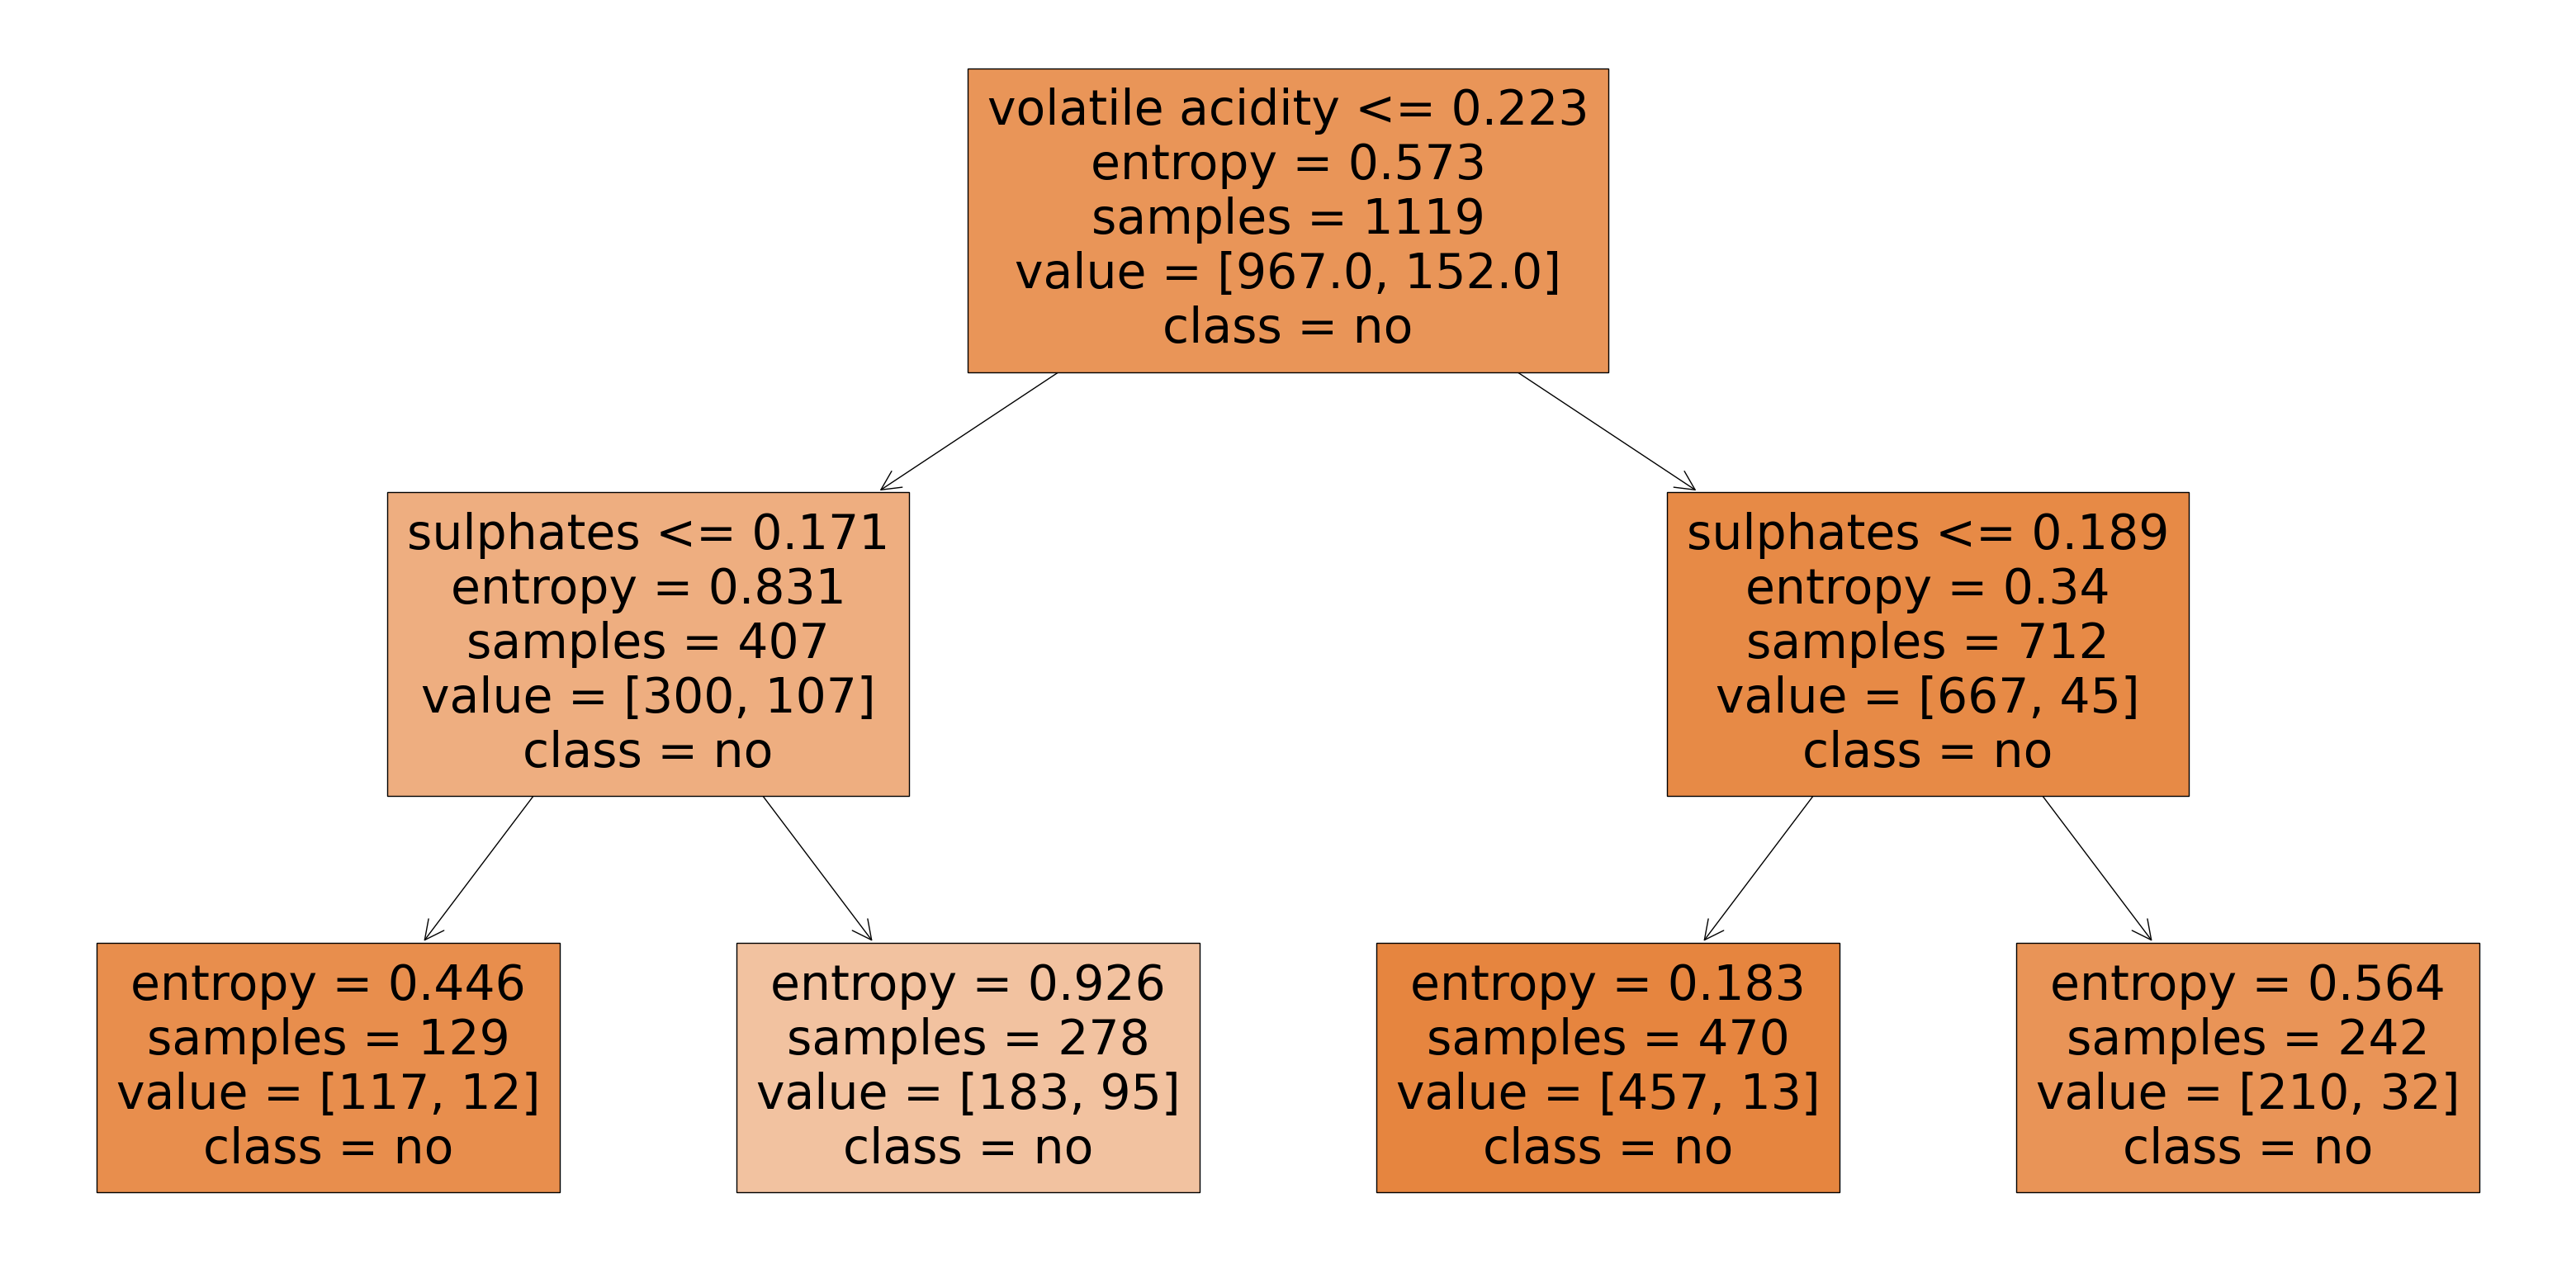

In [29]:
plt.figure(figsize=(40,20))
tree.plot_tree(dt_new, feature_names=fn, class_names=cn, filled=True)
plt.show()